# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [195]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

mean_br = []
mean_px = []

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

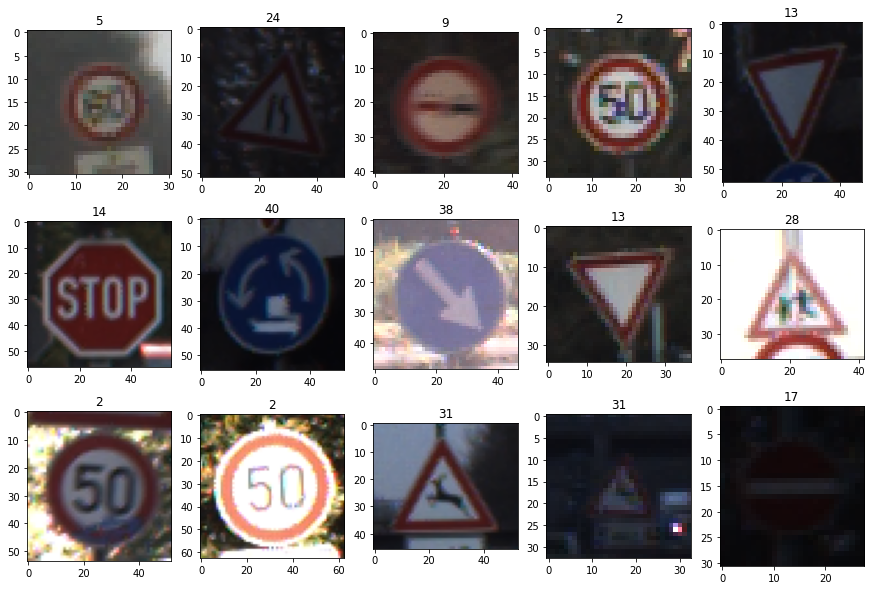

In [196]:
# Load the training labels
root = os.getcwd() + '\datasets\kaggle\GTSRB' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)
# print(num_samples)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [197]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']
# print(f'clid: {ids[:10]}')

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

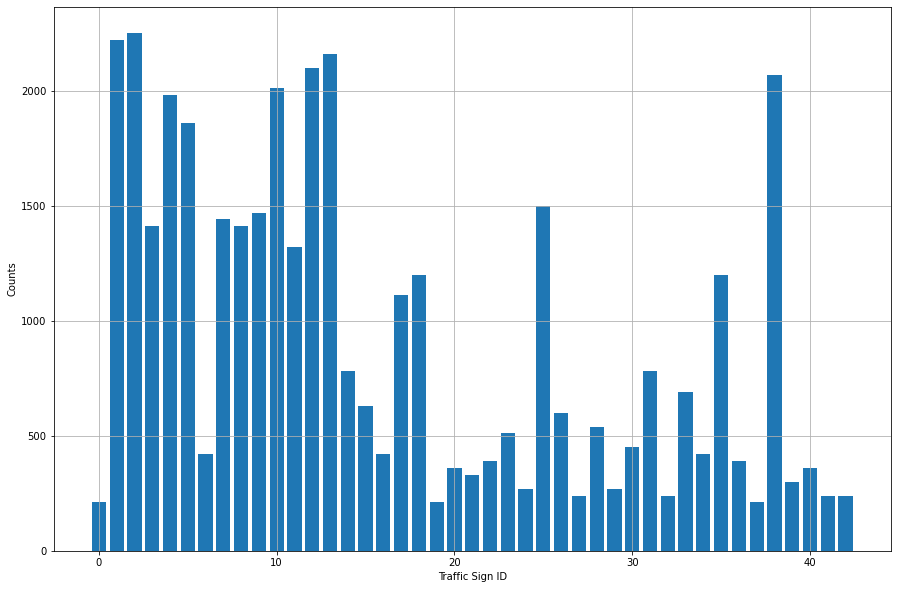

In [198]:
from collections import Counter
# print(type(ids))
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

### Answers
* no, this dataset is not well-balanced. Some classes have 200-250 examples whereas others have more than 2500
* 2,3,5,6,10,12,13 and 38 - over. 1,7,16,19, 20,21,22, 24,27,29,32, 37,39,40, 41,42 - under

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

### Optional answers (see below for code and graphs)
1. Resolution: Most of the images in this dataset are small images (have a low number of pixels). Also, there are a few very large images.
2. Brightness: Most of the images in this dataset are rather dark, few of them are very bright though

Calculating images pixels


100%|██████████| 39209/39209 [00:10<00:00, 3861.21it/s]


Avg. dataset pixel numbers per image: 9332.181386926472


(Text(0.5, 0, 'Number of hundreds of pixels'), Text(0, 0.5, 'Counts'))

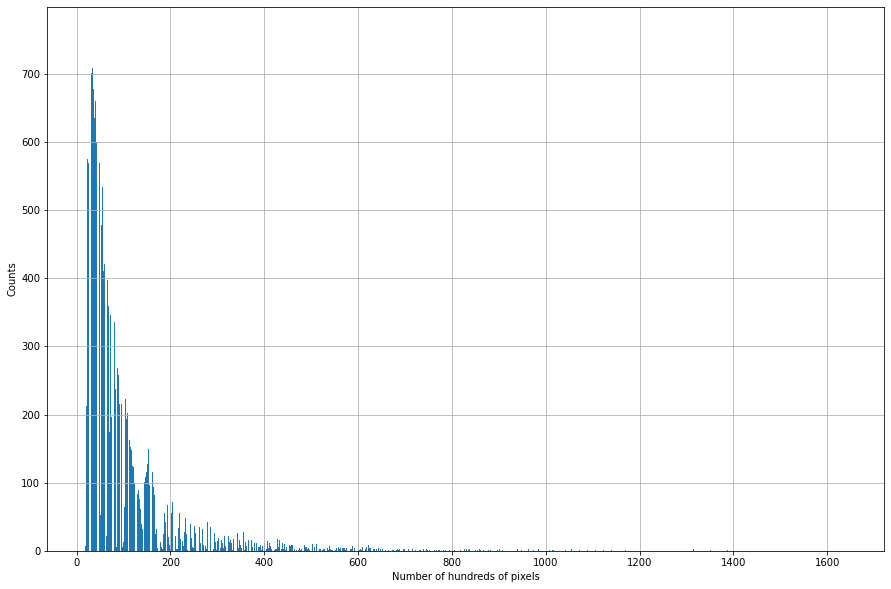

In [199]:
### Dataset Image Resolution (number of pixels) Analysis ###

from tqdm import tqdm
def calc_pixels():
    # Calculate number of pixels for every single picture in dataset
    # more pixels = larger image
    # return array of numbers of pixel
    print(f'Calculating images pixels')
    dataset_pixels = np.array([], dtype=np.int8)
    for img_name in tqdm(data['Path']):
        img = cv2.imread(os.path.join(root, img_name))
        pixels = np.round(img.size / 100, decimals=0)
        dataset_pixels = np.append(dataset_pixels, pixels)    
    return dataset_pixels

# Only calculate mean_br once for given dataset (saves time)
if len(mean_px) == 0:
    mean_px = calc_pixels()  
    
# print(mean_px[:100])    

print(f'Avg. dataset pixel numbers per image: {np.mean(mean_px) * 100}')

hist = Counter(mean_px)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Number of hundreds of pixels'), plt.ylabel('Counts')

Calculating images brightness


100%|██████████| 39209/39209 [00:11<00:00, 3401.40it/s]


Avg. dataset brightness: 82.77094544619858


(Text(0.5, 0, 'Mean Image Brightness'), Text(0, 0.5, 'Counts'))

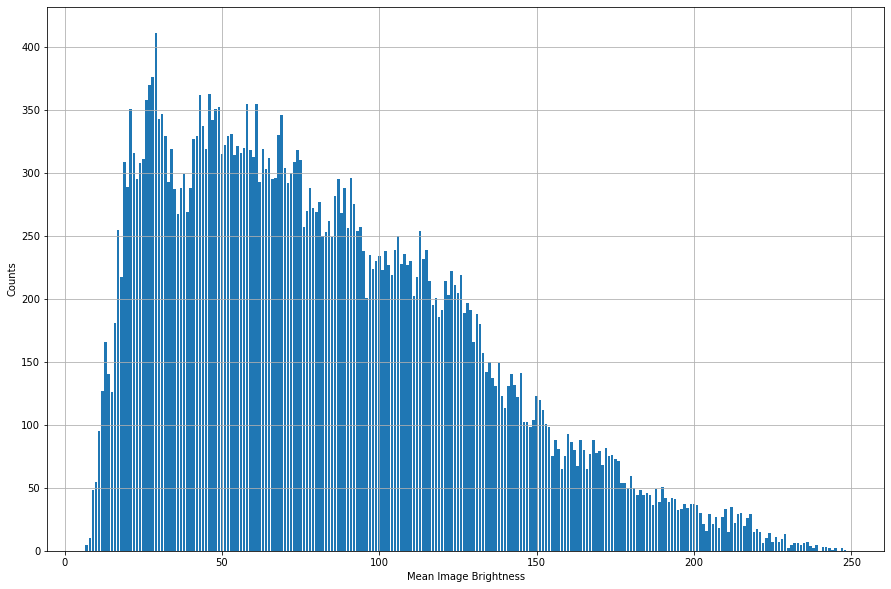

In [200]:
### Dataset Brightness Analysis ###

from tqdm import tqdm
def calc_mean_brightness():
    # Calculate average brightness for all channels for every single picture in dataset
    # return array of average brightness
    print(f'Calculating images brightness')
    avg_brightness_individual = np.array([], dtype=np.int8)
    for img_name in tqdm(data['Path']):
        img = cv2.imread(os.path.join(root, img_name))
        mean = np.mean(img)
        avg_brightness_individual = np.append(avg_brightness_individual, mean)    
    return avg_brightness_individual

# Only calculate mean_br once for given dataset (saves time)
if len(mean_br) == 0:
    mean_br = calc_mean_brightness().round(decimals=0)  
    
print(f'Avg. dataset brightness: {np.mean(mean_br)}')

hist = Counter(mean_br)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Mean Image Brightness'), plt.ylabel('Counts')